# Data Driven Agriculture

## Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset From csv File

In [5]:
dataset = pd.read_csv("model_data.csv")
x = dataset.iloc[:,:3]
y = dataset.iloc[:,5]

In [6]:
print(x)
print(y)

    year  population  wheat_surplus
0   2020  1380004385          8.090
1   2019  1366417754          7.490
2   2018  1352642280          4.240
3   2017  1338676785          2.830
4   2016  1324517249         -4.940
..   ...         ...            ...
56  1964   488848135         -6.676
57  1963   478825608         -5.271
58  1962   469077190         -2.744
59  1961   459642165         -2.895
60  1960   450547679         -3.900

[61 rows x 3 columns]
0     99.50
1     96.11
2     95.63
3     95.68
4     97.23
      ...  
56    16.53
57    16.05
58    14.82
59    13.89
60    14.22
Name: wheat_demands, Length: 61, dtype: float64


## Data Preprocessing

### Splitting data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
print(x_test)
print(y_test)

    year  population  wheat_surplus
26  1994   945601831          1.510
35  1985   784360008          0.349
60  1960   450547679         -3.900
28  1992   909307016         -1.830
11  2009  1217726215          2.530
2   2018  1352642280          4.240
34  1986   801975244          1.482
59  1961   459642165         -2.895
40  1980   698952844         -2.500
22  1998  1019483581          2.640
4   2016  1324517249         -4.940
10  2010  1234281170         -0.960
30  1990   873277798          2.250
26    58.33
35    43.72
60    14.22
28    57.52
11    78.15
2     95.63
34    45.57
59    13.89
40    34.33
22    63.71
4     97.23
10    81.76
30    47.60
Name: wheat_demands, dtype: float64


### Seperating data for result visualization

In [9]:
x_visual = np.array(x_test)
y_visual = np.array(y_test)

### Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [12]:
print("The vector of means for year, population, wheat surplus is: ")
print(sc.mean_)
print("The vector of std deviation for year, populaion, wheat_surplus is: ")
stddev = []
for item in sc.var_:
    stddev.append(item**0.5)
print(stddev)

print("The mean of wheat demands is: ")
print(sc_y.mean_)
print("The std deviation of wheat demands is: ")
stddev = []
for item in sc_y.var_:
    stddev.append(item**0.5)
print(stddev)

The vector of means for year, population, wheat surplus is: 
[ 1.98939583e+03  8.77977753e+08 -6.17166667e-01]
The vector of std deviation for year, populaion, wheat_surplus is: 
[17.503261104878586, 290867828.9353266, 4.608428466468321]
The mean of wheat demands is: 
[52.10958333]
The std deviation of wheat demands is: 
[26.105036866980075]


## Training the Model

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x_train,y_train)

C:\Users\vip\anaconda3\envs\farming\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Testing the Model

In [22]:
print(x_test)

[[ 0.26304622  0.23249074  0.46158179]
 [-0.25114368 -0.32185665  0.20965209]
 [-1.67944894 -1.46949931 -0.71235419]
 [ 0.1487818   0.10770962 -0.26317721]
 [ 1.12002938  1.16805101  0.68291538]
 [ 1.63421927  1.63189077  1.05397463]
 [-0.19401147 -0.26129569  0.45550597]
 [-1.62231673 -1.43823258 -0.49427551]
 [-0.53680473 -0.61548543 -0.40856299]
 [ 0.49157506  0.48649529  0.70678469]
 [ 1.51995485  1.53519727 -0.93802765]
 [ 1.17716159  1.22496674 -0.07439268]
 [ 0.03451738 -0.01615839  0.62215714]]


In [14]:
sc_y.inverse_transform(regressor.predict(x_test))

array([59.50709583, 45.2225854 , 18.4822097 , 58.24832624, 82.91627328,
       94.69388916, 46.69197911, 19.14298189, 36.70135791, 64.41040363,
       77.93186623, 83.23103891, 52.7666193 ])

In [15]:
print(sc_y.inverse_transform((y_test)))

[[58.33]
 [43.72]
 [14.22]
 [57.52]
 [78.15]
 [95.63]
 [45.57]
 [13.89]
 [34.33]
 [63.71]
 [97.23]
 [81.76]
 [47.6 ]]


### Final Accuracy


In [16]:
from sklearn.metrics import r2_score
acc = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(x_test)))
print(acc*100,"%")

94.52654276692948 %


## Visualizing the results

In [17]:
year = x_visual[:, 0]

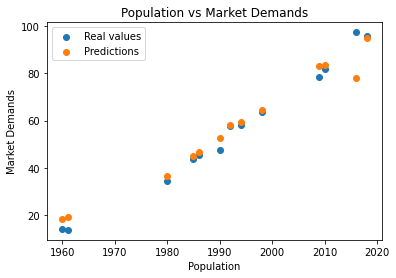

In [18]:
plt.scatter(year, y_visual)
plt.scatter(year, sc_y.inverse_transform(regressor.predict(x_test)))
plt.xlabel("Population")
plt.ylabel("Market Demands")
plt.title("Population vs Market Demands")
plt.legend(["Real values", "Predictions"])
plt.show()

## Saving the model in pickle file

In [19]:
import pickle

file = open("svr_model.pkl", "wb")
pickle.dump(regressor, file)

## Making a single prediction

In [29]:
year = 1960
population = 450547679
surplus = -3.9

year = (year - 1989.4)/17.503
population = (population - 877977753)/290867828.935
surplus = (surplus + 0.617)/4.6084
new_features = np.array([[ year, population, surplus]])
demand = regressor.predict(new_features)
demand = (demand * 26.1050) + 52.10958

print("year:{}".format(year))
print("population:{}".format(population))
print("surplus:{}".format(surplus))
print(demand)

year:-1.6797120493629716
population:-1.4694993102709804
surplus:-0.7123947573995313
[18.48301997]
